# BBM409 Assignment_0

Group Member: Mustafa İhsan Akagündüz

Group Member: Selhattin ENÇ

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import warnings
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
warnings.filterwarnings('ignore')

In [8]:
data=pd.read_csv("star_classification.csv") #CSV File is read
df=data.copy()

rows,columns = df.shape
unique=df.nunique()
unique["Total Rows"] = rows


df.drop('rerun_ID',axis=1, inplace=True) 
df.drop('spec_obj_ID', axis=1, inplace=True)

Explain why you use those methods, etc.

By using "read_csv" method, we read the csv file,
with "shape" method; we got the rows and columns,
with "drop" method we dropped the unnecesary columns.

## Split the dataset

80% training & 20% test  or 5-fold cross validation

In [9]:
y = df['class']
x = df.drop('class', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


## Classification Methods

In this homework, we use kNN, weighted-kNN, Naive Bayes, Random Forest, and SVM classification methods.

### Random Forest


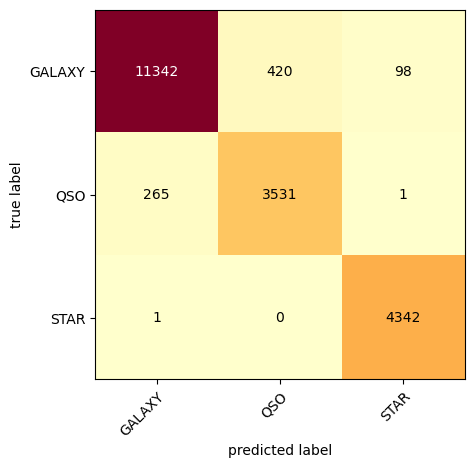

Precision :
GALAXY: 0.9770847691247415
QSO: 0.8936977980258163
STAR: 0.9777077234857015

Recall:
GALAXY: 0.9563237774030354
QSO: 0.9299446931788254
STAR: 0.9997697444163021

F1-Score:
GALAXY: 0.9665928072268622
QSO: 0.9114610221992773
STAR: 0.988615664845173

Accuracy : 0.96075


In [4]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# SMOTE
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Random Forest usage
rf = RandomForestClassifier(max_depth=7, max_features=3, n_estimators=100)
rf.fit(x_train_smote, y_train_smote)

#Confusion matrix is created
v = confusion_matrix(y_test, rf.predict(x_test))

#Confusion matrix is drawed
plot_confusion_matrix(v, class_names=["GALAXY", "QSO", "STAR"], cmap='YlOrRd')
plt.show()

#Classification metrics are taken and printed
report = classification_report(y_test, rf.predict(x_test), target_names=["GALAXY", "QSO", "STAR"], output_dict=True)
print("Precision :")
print("GALAXY:", report["GALAXY"]["precision"])
print("QSO:", report["QSO"]["precision"])
print("STAR:", report["STAR"]["precision"])
print("\nRecall:")
print("GALAXY:", report["GALAXY"]["recall"])
print("QSO:", report["QSO"]["recall"])
print("STAR:", report["STAR"]["recall"])
print("\nF1-Score:")
print("GALAXY:", report["GALAXY"]["f1-score"])
print("QSO:", report["QSO"]["f1-score"])
print("STAR:", report["STAR"]["f1-score"])
print("\nAccuracy :", accuracy_score(y_test, rf.predict(x_test)))


Explain your results, draw plots, tables etc.

These results indicate that our model generally achieves high accuracy and performs well on a class-by-class basis. Precision, recall, and F1-Score for the GALAXY and STAR classes are quite high, but for the QSO class, precision and F1-Score are slightly lower. This suggests that your model may require further improvement in recognizing the QSO class.

### kNN

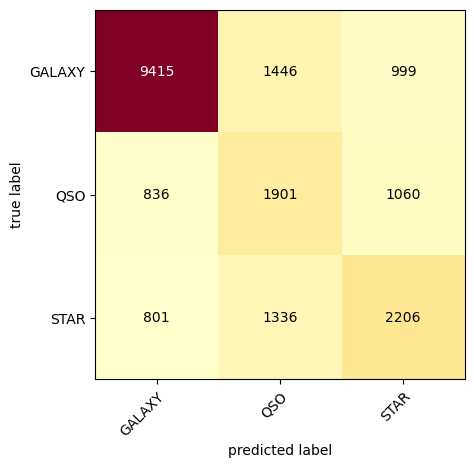

Precision :
GALAXY: 0.8518820123054651
QSO: 0.4059363655776212
STAR: 0.5172332942555686

Recall:
GALAXY: 0.7938448566610455
QSO: 0.500658414537793
STAR: 0.5079438176375777

F1-Score:
GALAXY: 0.8218400837988827
QSO: 0.44834905660377367
STAR: 0.512546468401487

Accuracy : 0.6761


In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

#SMOTE
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

#kNN usage
knn = KNeighborsClassifier(n_neighbors=5)  # Burada 5 komşu kullanıldı, kendi modelinize uygun bir değeri seçebilirsiniz
knn.fit(x_train_smote, y_train_smote)

#Confusion matrix is created
v = confusion_matrix(y_test, knn.predict(x_test))

#Confusion matrix is drawed
plot_confusion_matrix(v, class_names=["GALAXY", "QSO", "STAR"], cmap='YlOrRd')
plt.show()

# Classification metrics are taken and printed
report = classification_report(y_test, knn.predict(x_test), target_names=["GALAXY", "QSO", "STAR"], output_dict=True)
print("Precision :")
print("GALAXY:", report["GALAXY"]["precision"])
print("QSO:", report["QSO"]["precision"])
print("STAR:", report["STAR"]["precision"])
print("\nRecall:")
print("GALAXY:", report["GALAXY"]["recall"])
print("QSO:", report["QSO"]["recall"])
print("STAR:", report["STAR"]["recall"])
print("\nF1-Score:")
print("GALAXY:", report["GALAXY"]["f1-score"])
print("QSO:", report["QSO"]["f1-score"])
print("STAR:", report["STAR"]["f1-score"])
print("\nAccuracy :", accuracy_score(y_test, knn.predict(x_test)))



As a result, it appears that this model may require improvements, particularly in recognizing the QSO class. For the other classes, it demonstrates a moderate level of performance.

# Weighted kNN

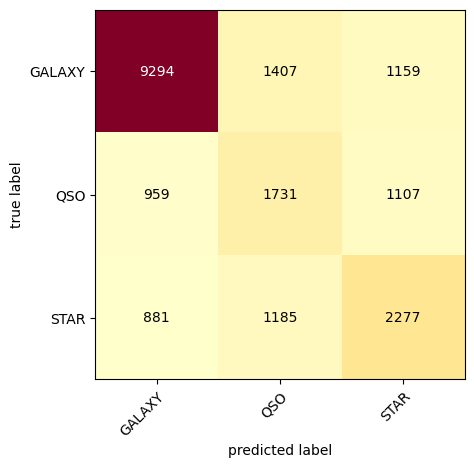

Precision :
GALAXY: 0.8347404347045088
QSO: 0.40041637751561415
STAR: 0.5012106537530266

Recall:
GALAXY: 0.7836424957841484
QSO: 0.4558862259678694
STAR: 0.5242919640801289

F1-Score:
GALAXY: 0.8083847960337479
QSO: 0.42635467980295566
STAR: 0.512491559756921

Accuracy : 0.6651


In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE


#SMOTE
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Weighted kNN usage
knn_weighted = KNeighborsClassifier(n_neighbors=5, weights='distance')  # Burada "weights" parametresi "distance" olarak ayarlandı
knn_weighted.fit(x_train_smote, y_train_smote)

#Confusion matrix is created
v = confusion_matrix(y_test, knn_weighted.predict(x_test))

#Confusion matrix is drawed
plot_confusion_matrix(v, class_names=["GALAXY", "QSO", "STAR"], cmap='YlOrRd')
plt.show()

# Classification metrics are taken and printed
report = classification_report(y_test, knn_weighted.predict(x_test), target_names=["GALAXY", "QSO", "STAR"], output_dict=True)
print("Precision :")
print("GALAXY:", report["GALAXY"]["precision"])
print("QSO:", report["QSO"]["precision"])
print("STAR:", report["STAR"]["precision"])
print("\nRecall:")
print("GALAXY:", report["GALAXY"]["recall"])
print("QSO:", report["QSO"]["recall"])
print("STAR:", report["STAR"]["recall"])
print("\nF1-Score:")
print("GALAXY:", report["GALAXY"]["f1-score"])
print("QSO:", report["QSO"]["f1-score"])
print("STAR:", report["STAR"]["f1-score"])
print("\nAccuracy :", accuracy_score(y_test, knn_weighted.predict(x_test)))


In summary, the model generally performs well in classifying galaxies, with a good balance between precision and recall. However, it has room for improvement in classifying QSO objects, which have lower precision and recall. The performance in classifying stars falls in between but could also benefit from some improvement for a more balanced overall performance.

# Naive Bayes

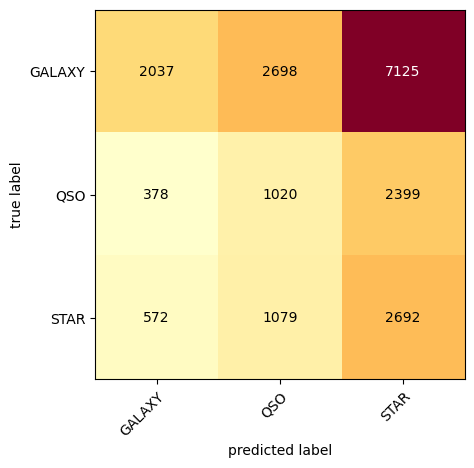

Precision :
GALAXY: 0.6819551389353867
QSO: 0.21263289555972484
STAR: 0.2203667321545514

Recall:
GALAXY: 0.17175379426644183
QSO: 0.26863313141954176
STAR: 0.6198480313147594

F1-Score:
GALAXY: 0.2743988684582744
QSO: 0.2373749127298115
STAR: 0.32514040702941

Accuracy : 0.28745


In [6]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

#SMOTE
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

#Naive Bayes usage
nb = GaussianNB()
nb.fit(x_train_smote, y_train_smote)

#Confusion matrix is created
v = confusion_matrix(y_test, nb.predict(x_test))

#Confusion matrix is drawed
plot_confusion_matrix(v, class_names=["GALAXY", "QSO", "STAR"], cmap='YlOrRd')
plt.show()

#Classification metrics are taken and printed
report = classification_report(y_test, nb.predict(x_test), target_names=["GALAXY", "QSO", "STAR"], output_dict=True)
print("Precision :")
print("GALAXY:", report["GALAXY"]["precision"])
print("QSO:", report["QSO"]["precision"])
print("STAR:", report["STAR"]["precision"])
print("\nRecall:")
print("GALAXY:", report["GALAXY"]["recall"])
print("QSO:", report["QSO"]["recall"])
print("STAR:", report["STAR"]["recall"])
print("\nF1-Score:")
print("GALAXY:", report["GALAXY"]["f1-score"])
print("QSO:", report["QSO"]["f1-score"])
print("STAR:", report["STAR"]["f1-score"])
print("\nAccuracy :", accuracy_score(y_test, nb.predict(x_test)))


In summary, the model appears to have significant challenges in correctly predicting all three classes, with particularly low performance in the QSO class. Improvement is needed to enhance the model's predictive capabilities.

1
2
3
4


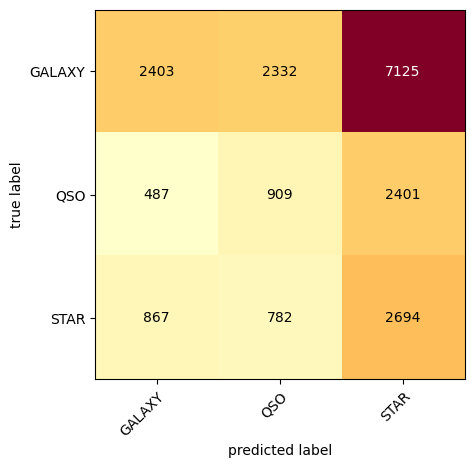

5
Precision :
GALAXY: 0.6396060686718126
QSO: 0.22595078299776286
STAR: 0.2204582651391162

Recall:
GALAXY: 0.20261382799325464
QSO: 0.2393995259415328
STAR: 0.6203085424821552

F1-Score:
GALAXY: 0.30774156368060446
QSO: 0.23248081841432228
STAR: 0.3253033870675603

Accuracy : 0.3003
6


In [5]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

#SMOTE
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# SVM usage
svm = SVC(kernel='rbf') 
svm.fit(x_train_smote, y_train_smote)

#Confusion matrix is created
v = confusion_matrix(y_test, svm.predict(x_test))

#Confusion matrix is drawed
plot_confusion_matrix(v, class_names=["GALAXY", "QSO", "STAR"], cmap='YlOrRd')
plt.show()

# Classification metrics are taken and printed
report = classification_report(y_test, svm.predict(x_test), target_names=["GALAXY", "QSO", "STAR"], output_dict=True)
print("Precision :")
print("GALAXY:", report["GALAXY"]["precision"])
print("QSO:", report["QSO"]["precision"])
print("STAR:", report["STAR"]["precision"])
print("\nRecall:")
print("GALAXY:", report["GALAXY"]["recall"])
print("QSO:", report["QSO"]["recall"])
print("STAR:", report["STAR"]["recall"])
print("\nF1-Score:")
print("GALAXY:", report["GALAXY"]["f1-score"])
print("QSO:", report["QSO"]["f1-score"])
print("STAR:", report["STAR"]["f1-score"])
print("\nAccuracy :", accuracy_score(y_test, svm.predict(x_test)))


In summary, the model's performance is not satisfactory for all three classes, and there is room for improvement in terms of precision, recall, and overall accuracy. Further analysis and potential model adjustments may be necessary to enhance its performance.